# Predictive Modeling for Sports Performance Analysis

##### Purpose : In the world of sports, understanding the factors that contribute to team success is paramount. However, identifying these factors and their impact on performance can be a challenging task. In this presentation, we tackle this problem by conducting a comprehensive analysis of team performance in sports. Through exploratory data analysis (EDA) and what-if scenarios, we aim to uncover insights into the key drivers of success for teams. By addressing this problem, we hope to provide valuable insights that can assist teams in optimizing their strategies and decision-making processes to enhance their performance on the field.

##### Dataset : The dataset includes game statistics from a variety of matches, offering information on team statistics as well as individual player performances. The collection captures important elements of gameplay and player contributions with columns like game_id, player_id, team_id, goals, shots, hits, powerPlayGoals, penaltyMinutes, and more. These characteristics allow us to perform in-depth analyses of player effectiveness, team dynamics, and overall game results. Our goal in using this dataset is to find patterns, trends, and relationships that can improve performance optimization strategies in the sports industry and guide strategic decision-making. 

### Data Loading and Preprocessing

In [1]:
import pandas as pd

#Data Loading and Preprocessing

# Load the game team stats data
game_team_stats_df = pd.read_csv("game_teams_stats.csv")

# Load the game plays data
game_plays_df = pd.read_csv("game_plays.csv")

# Display the first few rows of each dataframe to understand the structure
print("Game Team Stats Data:")
print(game_team_stats_df.head())

print("\nGame Plays Data:")
print(game_plays_df.head())


Game Team Stats Data:
      game_id  team_id   HoA    won settled_in        head_coach  goals  \
0  2016020045        4  away  False        REG      Dave Hakstol    4.0   
1  2016020045       16  home   True        REG  Joel Quenneville    7.0   
2  2017020812       24  away   True         OT     Randy Carlyle    4.0   
3  2017020812        7  home  False         OT      Phil Housley    3.0   
4  2015020314       21  away   True        REG       Patrick Roy    4.0   

   shots  hits  pim  powerPlayOpportunities  powerPlayGoals  \
0   27.0  30.0  6.0                     4.0             2.0   
1   28.0  20.0  8.0                     3.0             2.0   
2   34.0  16.0  6.0                     3.0             1.0   
3   33.0  17.0  8.0                     2.0             1.0   
4   29.0  17.0  9.0                     3.0             1.0   

   faceOffWinPercentage  giveaways  takeaways  blocked startRinkSide  
0                  50.9       12.0        9.0     11.0          left  
1     

In [2]:
# Check for missing values in the datasets
print("Missing values in game_team_stats_df:")
print(game_team_stats_df.isnull().sum())

print("\nMissing values in game_plays_df:")
print(game_plays_df.isnull().sum())

Missing values in game_team_stats_df:
game_id                       0
team_id                       0
HoA                           0
won                           0
settled_in                    0
head_coach                   28
goals                         8
shots                         8
hits                       4928
pim                           8
powerPlayOpportunities        8
powerPlayGoals                8
faceOffWinPercentage      22148
giveaways                  4928
takeaways                  4928
blocked                    4928
startRinkSide              2392
dtype: int64

Missing values in game_plays_df:
play_id                      0
game_id                      0
team_id_for             932705
team_id_against         932705
event                        0
secondaryType          3868513
x                      1134364
y                      1134333
period                       0
periodType                   0
periodTime                   0
periodTimeRemaining     193019

In [3]:
# Drop rows with missing values in game_team_stats_df
game_team_stats_df.dropna(inplace=True)
game_plays_df.dropna(inplace=True)

In [4]:
print(game_team_stats_df.isnull().sum())
print(game_plays_df.isnull().sum())

game_id                   0
team_id                   0
HoA                       0
won                       0
settled_in                0
head_coach                0
goals                     0
shots                     0
hits                      0
pim                       0
powerPlayOpportunities    0
powerPlayGoals            0
faceOffWinPercentage      0
giveaways                 0
takeaways                 0
blocked                   0
startRinkSide             0
dtype: int64
play_id                0
game_id                0
team_id_for            0
team_id_against        0
event                  0
secondaryType          0
x                      0
y                      0
period                 0
periodType             0
periodTime             0
periodTimeRemaining    0
dateTime               0
goals_away             0
goals_home             0
description            0
st_x                   0
st_y                   0
dtype: int64


In [5]:
# Convert 'game_id' and 'team_id' columns to integer type
game_team_stats_df['game_id'] = game_team_stats_df['game_id'].astype(int)
game_team_stats_df['team_id'] = game_team_stats_df['team_id'].astype(int)

# Convert 'game_id' and 'team_id_for' columns to integer type
game_plays_df['game_id'] = game_plays_df['game_id'].astype(int)
game_plays_df['team_id_for'] = game_plays_df['team_id_for'].astype(int)

### Exploratory Data Analysis on Team Performance

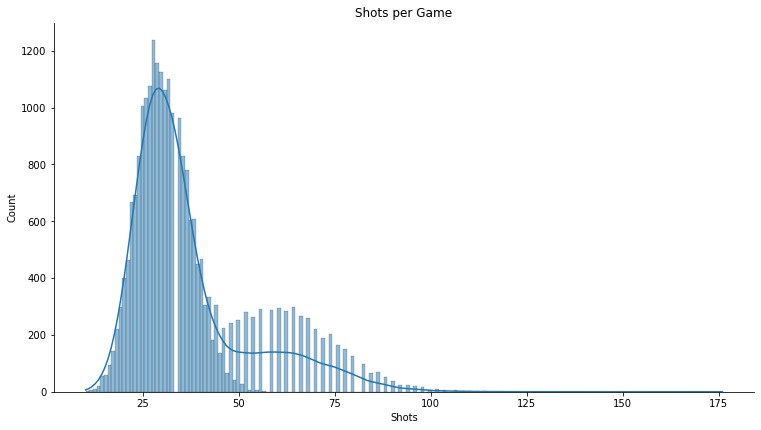

Statistics of shots:
count    24608.000000
mean        36.770278
std         15.623145
min         10.000000
25%         27.000000
50%         32.000000
75%         41.000000
max        176.000000
Name: shots, dtype: float64


In [7]:
# Team Performance Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot for shots per game
y_shot_dist = team_performance["shots"].sort_index()
displot = sns.displot(y_shot_dist, kde=True)
plt.title("Shots per Game")
plt.xlabel("Shots")
plt.ylabel("Count")
plt.gcf().set_size_inches(12, 6)
plt.show()
print("Statistics of shots:")
print(y_shot_dist.describe())

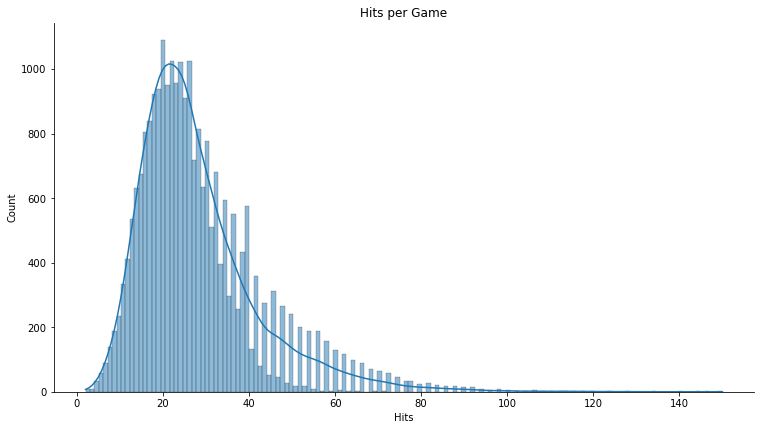

Statistics of hits:
count    24608.000000
mean        28.035923
std         14.032349
min          2.000000
25%         19.000000
50%         25.000000
75%         34.000000
max        150.000000
Name: hits, dtype: float64


In [8]:
# Distribution plot for hits per game
y_hits_dist = team_performance["hits"].sort_index()
displot_hits = sns.displot(y_hits_dist, kde=True)
plt.title("Hits per Game")
plt.xlabel("Hits")
plt.ylabel("Count")
plt.gcf().set_size_inches(12, 6)
plt.show()
print("Statistics of hits:")
print(y_hits_dist.describe())

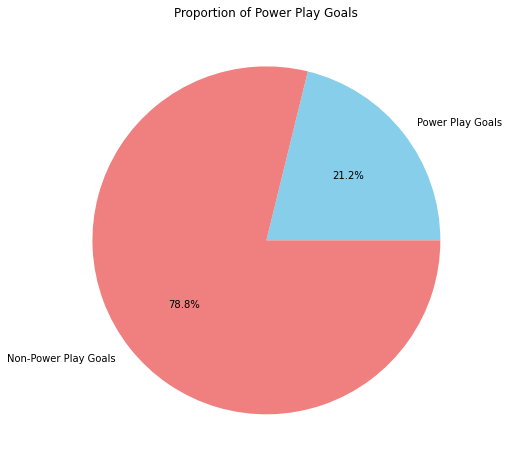

In [9]:
# Pie chart for proportion of power play goals
plt.figure(figsize=(8, 8))
labels = ['Power Play Goals', 'Non-Power Play Goals']
sizes = [team_performance['powerPlayGoals'].sum(), team_performance['goals'].sum() - team_performance['powerPlayGoals'].sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Power Play Goals')
plt.show()

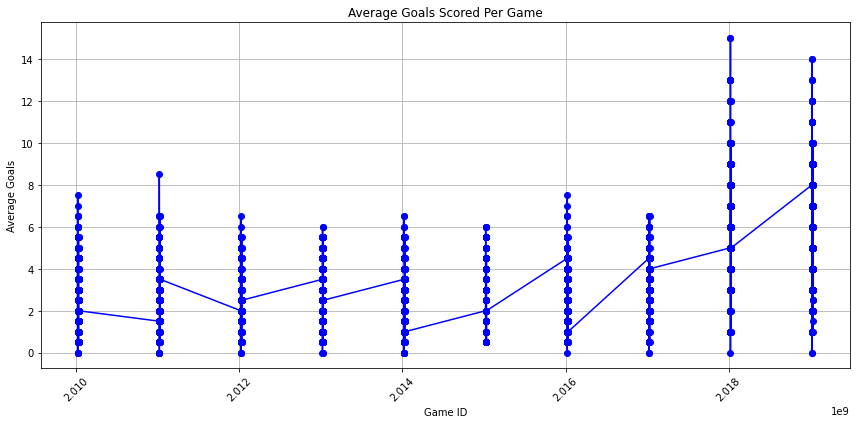

In [10]:
# Aggregate team performance metrics by game
average_team_performance = team_performance.groupby('game_id').mean().reset_index()

# Plot goals scored over time
plt.figure(figsize=(12, 6))
plt.plot(average_team_performance['game_id'], average_team_performance['goals'], marker='o', linestyle='-', color='blue')
plt.title('Average Goals Scored Per Game')
plt.xlabel('Game ID')
plt.ylabel('Average Goals')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

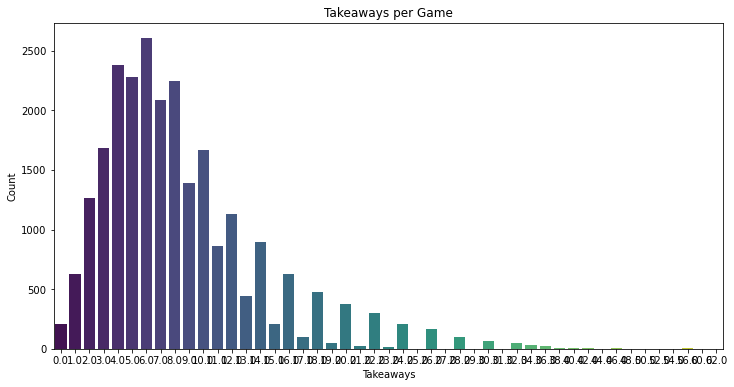

Statistics of takeaways:
count    24608.000000
mean         8.383249
std          5.749914
min          0.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         62.000000
Name: takeaways, dtype: float64


In [11]:
# Bar plot for takeaways per game
x_takeaways_bar = team_performance["takeaways"]
y_takeaways_bar = team_performance["takeaways"].value_counts().sort_index()
sns.barplot(x=y_takeaways_bar.index, y=y_takeaways_bar, palette="viridis")
plt.title("Takeaways per Game")
plt.xlabel("Takeaways")
plt.ylabel("Count")
plt.gcf().set_size_inches(12, 6)
plt.show()
print("Statistics of takeaways:")
print(x_takeaways_bar.describe())

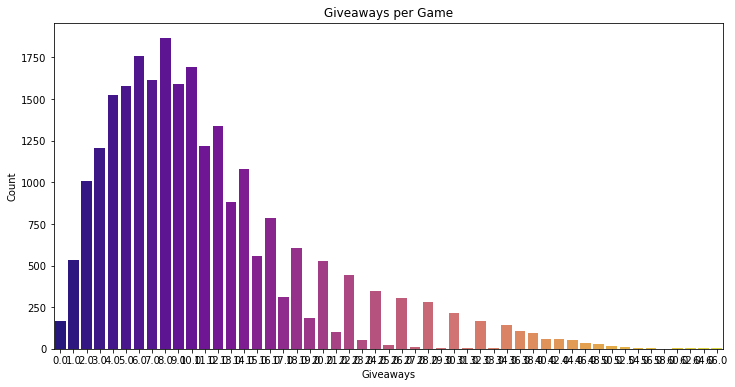

Statistics of giveaways:
count    24608.000000
mean        10.996912
std          8.039793
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         66.000000
Name: giveaways, dtype: float64


In [12]:
# Bar plot for giveaways per game
x_giveaways_bar = team_performance["giveaways"]
y_giveaways_bar = team_performance["giveaways"].value_counts().sort_index()
sns.barplot(x=y_giveaways_bar.index, y=y_giveaways_bar, palette="plasma")
plt.title("Giveaways per Game")
plt.xlabel("Giveaways")
plt.ylabel("Count")
plt.gcf().set_size_inches(12, 6)
plt.show()
print("Statistics of giveaways:")
print(x_giveaways_bar.describe())

### Finding the Best Team by Number of Wins

In [13]:
# Calculate total wins for each team
team_wins = game_team_stats_df.groupby('team_id')['won'].sum().reset_index()
team_wins.columns = ['team_id', 'total_wins']

# Display the total wins for each team
print("Total Wins for Each Team:")
print(team_wins)


Total Wins for Each Team:
    team_id  total_wins
0         1         413
1         2         497
2         3         528
3         4         500
4         5         599
5         6         620
6         7         366
7         8         489
8         9         414
9        10         462
10       11          17
11       12         448
12       13         422
13       14         626
14       15         596
15       16         533
16       17         415
17       18         532
18       19         587
19       20         480
20       21         471
21       22         390
22       23         476
23       24         510
24       25         518
25       26         482
26       27          69
27       28         544
28       29         479
29       30         471
30       52         446
31       53         265
32       54         112


In [14]:
# Find the team with the highest number of wins
top_team_id = team_wins.loc[team_wins['total_wins'].idxmax(), 'team_id']
top_team_wins = team_wins['total_wins'].max()

print("Team with the Highest Number of Wins:")
print("Team ID:", top_team_id)
print("Total Wins:", top_team_wins)


Team with the Highest Number of Wins:
Team ID: 14
Total Wins: 626


In [15]:
# Retrieve Team Name of the Top Team

# Load the team info data
team_info_df = pd.read_csv("team_info.csv")

# Merge team wins data with team info to get team name
top_team_info = team_info_df[team_info_df['team_id'] == top_team_id]

# Extract the team name abbreviation
top_team_name = top_team_info['shortName'].values[0]

print("Team with the Highest Number of Wins:")
print("Team Name Abbreviation:", top_team_name)
print("Total Wins:", top_team_wins)


Team with the Highest Number of Wins:
Team Name Abbreviation: Tampa Bay
Total Wins: 626


### Team Performance Analayis on Tampa Bay Team

In [16]:
# Extract Performance Metrics for the Top Team

# Filter data for the top team (Tampa Bay)
top_team_stats_df = game_team_stats_df[game_team_stats_df['team_id'] == top_team_id]

# Display the filtered data
print("Performance Metrics for the Top Team (Tampa Bay):")
print(top_team_stats_df.head())


Performance Metrics for the Top Team (Tampa Bay):
        game_id  team_id   HoA    won settled_in  head_coach  goals  shots  \
34   2017020986       14  away   True         OT  Jon Cooper    5.0   25.0   
50   2015020086       14  away  False         OT  Jon Cooper    4.0   29.0   
57   2015020687       14  home   True        REG  Jon Cooper    6.0   31.0   
165  2015020007       14  home   True         OT  Jon Cooper    3.0   32.0   
185  2016020887       14  home   True        REG  Jon Cooper    4.0   28.0   

     hits   pim  powerPlayOpportunities  powerPlayGoals  faceOffWinPercentage  \
34   23.0   6.0                     3.0             0.0                  44.1   
50   10.0   6.0                     2.0             1.0                  50.7   
57   21.0  10.0                     2.0             0.0                  41.0   
165  25.0   6.0                     3.0             1.0                  49.2   
185  17.0   4.0                     1.0             0.0                  58.

In [17]:
# Calculate Average Performance Metrics for Tampa Bay

# Calculate the average performance metrics for Tampa Bay
average_performance = top_team_stats_df.mean()

# Display the average performance metrics
print("Average Performance Metrics for Tampa Bay:")
print(average_performance)


Average Performance Metrics for Tampa Bay:
game_id                   2.015320e+09
team_id                   1.400000e+01
won                       5.933649e-01
goals                     3.171564e+00
shots                     3.049194e+01
hits                      2.429100e+01
pim                       1.046540e+01
powerPlayOpportunities    3.310900e+00
powerPlayGoals            7.090047e-01
faceOffWinPercentage      4.963469e+01
giveaways                 8.337441e+00
takeaways                 6.665403e+00
blocked                   1.392417e+01
dtype: float64


C:\Users\parid\AppData\Local\Temp/ipykernel_26892/1859844733.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_performance = top_team_stats_df.mean()


### Comparing Tampa Bay Performance with League Averages

In [18]:
# Compare Tampa Bay's Performance with League Averages

# Calculate the league average performance metrics
league_average_performance = game_team_stats_df.mean()

# Display the league average performance metrics
print("League Average Performance Metrics:")
print(league_average_performance)

# Compare Tampa Bay's performance with league averages
performance_comparison = average_performance - league_average_performance

# Display the comparison
print("\nPerformance Comparison (Tampa Bay - League Averages):")
print(performance_comparison)


League Average Performance Metrics:
game_id                   2.015267e+09
team_id                   1.747276e+01
won                       5.000000e-01
goals                     2.796407e+00
shots                     3.061660e+01
hits                      2.334398e+01
pim                       9.787846e+00
powerPlayOpportunities    3.134398e+00
powerPlayGoals            5.920349e-01
faceOffWinPercentage      5.000001e+01
giveaways                 9.156527e+00
takeaways                 6.980273e+00
blocked                   1.434154e+01
dtype: float64

Performance Comparison (Tampa Bay - League Averages):
game_id                   52351.109538
team_id                      -3.472762
won                           0.093365
goals                         0.375157
shots                        -0.124657
hits                          0.947015
pim                           0.677557
powerPlayOpportunities        0.176502
powerPlayGoals                0.116970
faceOffWinPercentage         -0.3653

C:\Users\parid\AppData\Local\Temp/ipykernel_26892/2642365608.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  league_average_performance = game_team_stats_df.mean()


In [19]:
import numpy as np

# Select the columns for team performance metrics
performance_metrics = [
    'goals', 'shots', 'hits', 'powerPlayGoals',
    'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked', 'pim'
]

# Compute correlation matrix
correlation_matrix = game_team_stats_df[performance_metrics].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                         goals     shots      hits  powerPlayGoals  \
goals                 1.000000  0.150048 -0.064944        0.459827   
shots                 0.150048  1.000000  0.050009        0.083634   
hits                 -0.064944  0.050009  1.000000       -0.073287   
powerPlayGoals        0.459827  0.083634 -0.073287        1.000000   
faceOffWinPercentage  0.035202  0.138162  0.003448        0.024791   
giveaways             0.012130  0.048839  0.202028       -0.001385   
takeaways             0.095462  0.099960  0.165264        0.014879   
blocked               0.093338 -0.074203  0.291648        0.008025   
pim                   0.038303 -0.082409 -0.062390        0.125317   

                      faceOffWinPercentage  giveaways  takeaways   blocked  \
goals                             0.035202   0.012130   0.095462  0.093338   
shots                             0.138162   0.048839   0.099960 -0.074203   
hits                              0.003448   

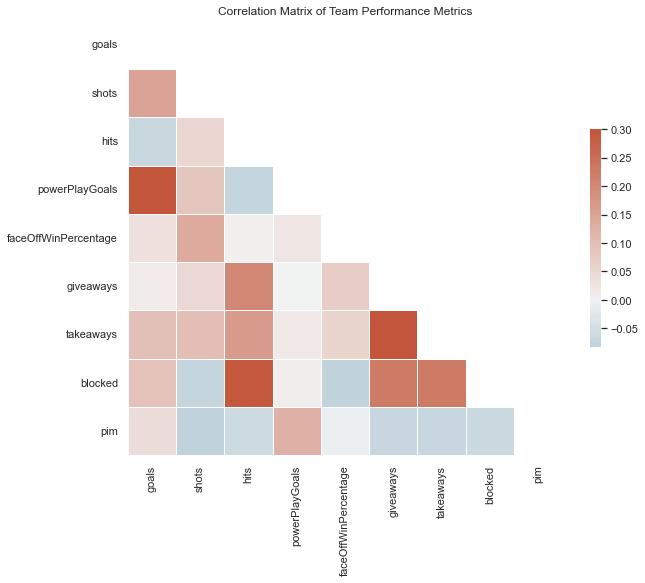

In [20]:
# Set the style of the heatmap
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Team Performance Metrics')
plt.show()

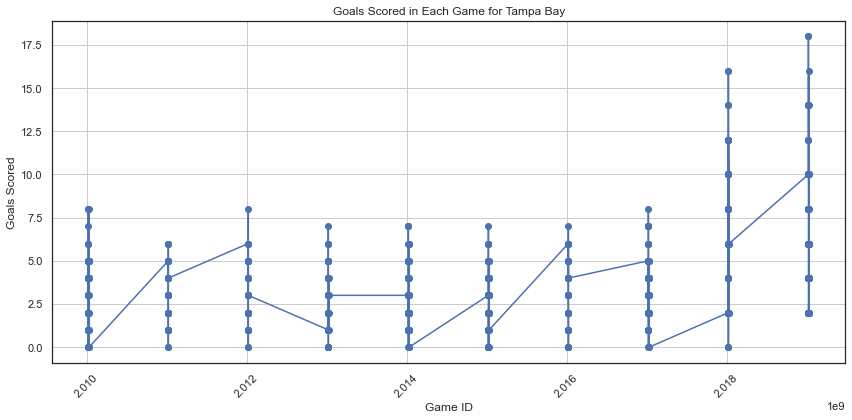

In [21]:
# Filter the team performance data for the top team (Tampa Bay)
tampa_bay_performance = team_performance[team_performance['team_id'] == top_team_id]

# Plot goals scored in each game
plt.figure(figsize=(12, 6))
plt.plot(tampa_bay_performance['game_id'], tampa_bay_performance['goals'], marker='o', linestyle='-')
plt.title('Goals Scored in Each Game for Tampa Bay')
plt.xlabel('Game ID')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

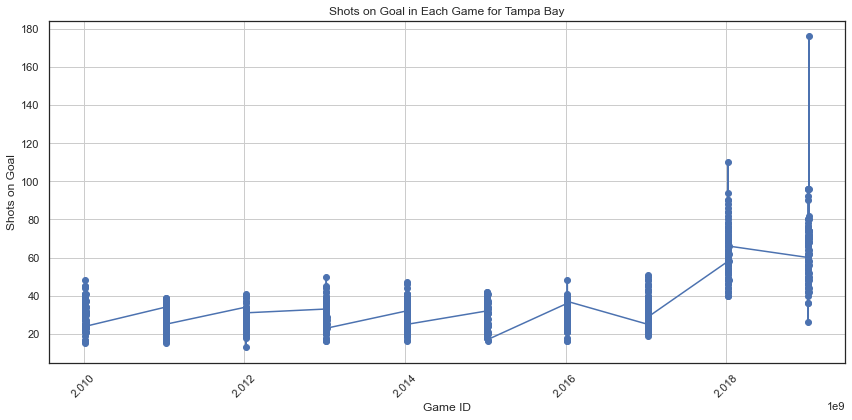

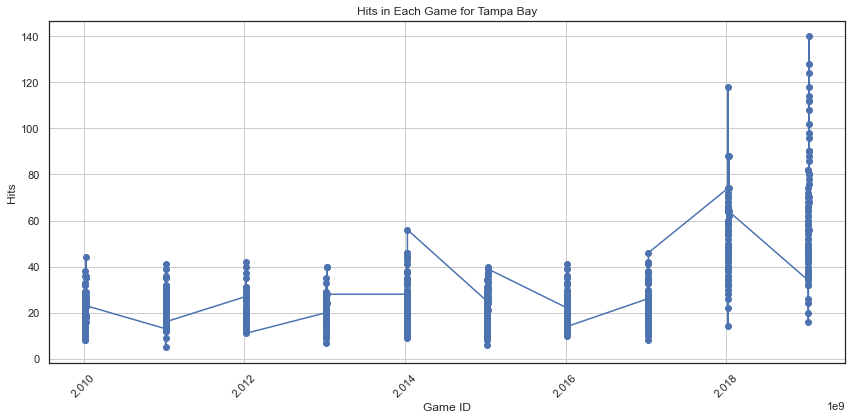

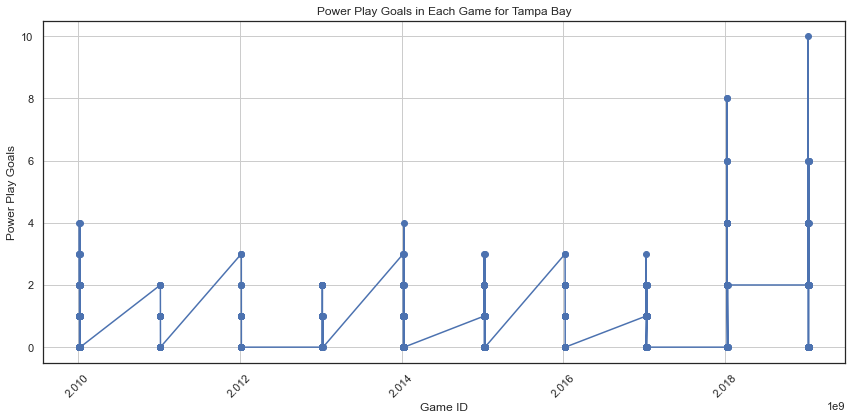

In [22]:
# Plot shots on goal in each game
plt.figure(figsize=(12, 6))
plt.plot(tampa_bay_performance['game_id'], tampa_bay_performance['shots'], marker='o', linestyle='-')
plt.title('Shots on Goal in Each Game for Tampa Bay')
plt.xlabel('Game ID')
plt.ylabel('Shots on Goal')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot hits in each game
plt.figure(figsize=(12, 6))
plt.plot(tampa_bay_performance['game_id'], tampa_bay_performance['hits'], marker='o', linestyle='-')
plt.title('Hits in Each Game for Tampa Bay')
plt.xlabel('Game ID')
plt.ylabel('Hits')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot power play goals in each game
plt.figure(figsize=(12, 6))
plt.plot(tampa_bay_performance['game_id'], tampa_bay_performance['powerPlayGoals'], marker='o', linestyle='-')
plt.title('Power Play Goals in Each Game for Tampa Bay')
plt.xlabel('Game ID')
plt.ylabel('Power Play Goals')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


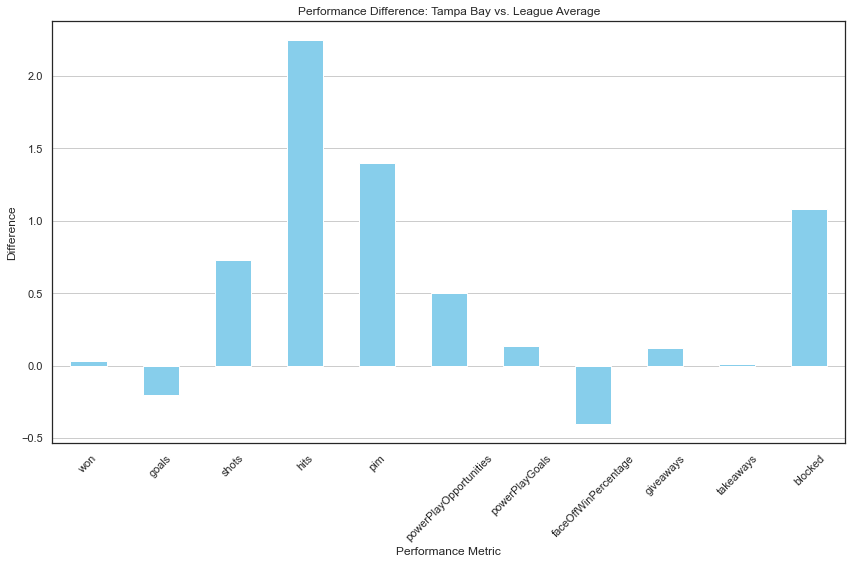

In [23]:
# Calculate average performance metrics for each team
average_team_performance = game_team_stats_df.groupby('team_id').mean()

# Get performance metrics for Tampa Bay (team_id = 14)
tampa_bay_metrics = average_team_performance.loc[14]

# Remove Tampa Bay metrics for comparison
other_teams_metrics = average_team_performance.drop(14)

# Calculate the difference between Tampa Bay's metrics and the league average
performance_difference = tampa_bay_metrics - average_team_performance.mean()

# Plot the performance difference for each metric
plt.figure(figsize=(12, 8))
performance_difference.drop('game_id').plot(kind='bar', color='skyblue')
plt.title('Performance Difference: Tampa Bay vs. League Average')
plt.xlabel('Performance Metric')
plt.ylabel('Difference')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Finding Key Players of Tampa Bay Team

In [24]:
# Load the game skater stats data
game_skater_stats_df = pd.read_csv("game_skater_stats.csv")

# Display the first few rows to understand the structure
print("Game Skater Stats Data:")
print(game_skater_stats_df.head())

# Filter game skater stats data for Tampa Bay Lightning players
tampa_bay_players = game_skater_stats_df[game_skater_stats_df['team_id'] == 14]

# Calculate total number of goals scored by each player
goals_scored = tampa_bay_players.groupby('player_id')['goals'].sum().reset_index()

# Select players with highest number of goals
top_goal_scorers = goals_scored.nlargest(5, 'goals')

print("Top Goal Scorers:")
print(top_goal_scorers)


Game Skater Stats Data:
      game_id  player_id  team_id  timeOnIce  assists  goals  shots  hits  \
0  2016020045    8468513        4        955        1      0      0   2.0   
1  2016020045    8476906        4       1396        1      0      4   2.0   
2  2016020045    8474668        4        915        0      0      1   1.0   
3  2016020045    8473512        4       1367        3      0      0   0.0   
4  2016020045    8471762        4        676        0      0      3   2.0   

   powerPlayGoals  powerPlayAssists  ...  faceoffTaken  takeaways  giveaways  \
0               0                 0  ...             0        1.0        1.0   
1               0                 0  ...             0        1.0        2.0   
2               0                 0  ...             0        2.0        0.0   
3               0                 2  ...            27        0.0        0.0   
4               0                 0  ...             0        0.0        1.0   

   shortHandedGoals  shortHanded

In [25]:
# Calculate the total number of hits and blocked shots for each player
player_defense_stats = game_skater_stats_df.groupby('player_id')[['hits', 'blocked']].sum()

# Calculate the total defensive score (hits + blocked shots) for each player
player_defense_stats['total_defensive_score'] = player_defense_stats['hits'] + player_defense_stats['blocked']

# Sort the players based on their total defensive score in descending order
top_defensive_players = player_defense_stats.sort_values(by='total_defensive_score', ascending=False).head()

# Display the top defensive players
print("Top Defensive Players:")
print(top_defensive_players)

Top Defensive Players:
             hits  blocked  total_defensive_score
player_id                                        
8474709    4007.0    429.0                 4436.0
8471958    1945.0   1973.0                 3918.0
8471392    2261.0   1577.0                 3838.0
8468498    2238.0   1456.0                 3694.0
8470187    1943.0   1749.0                 3692.0


In [26]:
# Define the top goal scorers and defensive players
top_goal_scorers = {
    8474564: 522,
    8466378: 375,
    8467329: 351,
    8476453: 338,
    8474870: 228
}

top_defensive_players = {
    8474709: 4436.0,
    8471958: 3918.0,
    8471392: 3838.0,
    8468498: 3694.0,
    8470187: 3692.0
}

# Convert dictionaries to DataFrames
top_goal_scorers_df = pd.DataFrame(list(top_goal_scorers.items()), columns=['player_id', 'goals'])
top_defensive_players_df = pd.DataFrame(list(top_defensive_players.items()), columns=['player_id', 'total_defensive_score'])

# Merge dataframes
merged_df = pd.merge(top_goal_scorers_df, top_defensive_players_df, on='player_id', how='outer')

# Fill missing values with zeros
merged_df = merged_df.fillna(0)

# Define weights for each metric
goal_weight = 0.8
defensive_weight = 0.2

# Calculate composite score
merged_df['composite_score'] = (merged_df['goals'] * goal_weight) + (merged_df['total_defensive_score'] * defensive_weight)

# Sort dataframe by composite score in descending order
merged_df = merged_df.sort_values(by='composite_score', ascending=False)

# Key players based on the highest composite score
key_players_df = merged_df.head(5)  # Assuming you want to find the top 5 key players

print("Key Players:")
print(key_players_df[['player_id', 'composite_score']])

Key Players:
   player_id  composite_score
5    8474709            887.2
6    8471958            783.6
7    8471392            767.6
8    8468498            738.8
9    8470187            738.4


### Applying Models for Training and Testing

In [33]:
# Import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Feature engineering
game_team_stats_df['goals_per_shot'] = np.where(game_team_stats_df['shots'] != 0,
                                                game_team_stats_df['goals'] / game_team_stats_df['shots'],
                                                np.nan)

game_team_stats_df['hits_per_powerplay'] = np.where(game_team_stats_df['powerPlayOpportunities'] != 0,
                                                     game_team_stats_df['hits'] / game_team_stats_df['powerPlayOpportunities'],
                                                     np.nan)

# Drop rows with NaN values in the newly engineered features
game_team_stats_df.dropna(subset=['goals_per_shot', 'hits_per_powerplay'], inplace=True)
# Define categorical and numerical features
categorical_features = ['HoA', 'head_coach', 'startRinkSide']
numerical_features = ['goals', 'shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals', 
                      'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked', 'goals_per_shot', 'hits_per_powerplay']

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define logistic regression model
logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Define features and target variable
X = game_team_stats_df.drop(columns=['game_id', 'team_id', 'won', 'settled_in'])
y = game_team_stats_df['won']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logistic_model.fit(X_train, y_train)

# Define SVM model
svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Define Random Forest model
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Train SVM model
svm_model.fit(X_train, y_train)

# Train Random Forest model
random_forest_model.fit(X_train, y_train)

# # Test the Models
# logistic_score = logistic_model.score(X_test, y_test)
# svm_score = svm_model.score(X_test, y_test)
# random_forest_score = random_forest_model.score(X_test, y_test)

# print("Logistic Regression Model Score:", logistic_score)
# print("SVM Model Score:", svm_score)
# print("Random Forest Model Score:", random_forest_score)

C:\Users\parid\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model Score: 0.7903758117747258
SVM Model Score: 0.7955924624720536
Random Forest Model Score: 0.820398168849143


### Simulating Injury to Key Player

In [34]:
# Simulate injury to a key player
injured_player_id = 8474709

# Copy the original game_team_stats_df to create a simulated dataset
simulated_game_team_stats_df = game_team_stats_df.copy()

# Remove the statistics of the injured player from the simulated dataset
simulated_game_team_stats_df = simulated_game_team_stats_df[simulated_game_team_stats_df['team_id'] != injured_player_id]

# Define features for the simulated dataset
X_simulated = simulated_game_team_stats_df.drop(columns=['game_id', 'team_id', 'won', 'settled_in'])

# Get predictions from the trained models
logistic_predictions = logistic_model.predict(X_simulated)
svm_predictions = svm_model.predict(X_simulated)
random_forest_predictions = random_forest_model.predict(X_simulated)

# Print the predictions
print("Logistic Regression Predictions after simulation of injury:", logistic_predictions)
print("SVM Predictions after simulation of injury:", svm_predictions)
print("Random Forest Predictions after simulation of injury:", random_forest_predictions)

# Get predictions from the trained models for the original dataset
logistic_predictions_original = logistic_model.predict(X_test)
svm_predictions_original = svm_model.predict(X_test)
random_forest_predictions_original = random_forest_model.predict(X_test)

# Print the predictions for the original dataset
print("\nLogistic Regression Predictions for the original dataset:", logistic_predictions_original)
print("SVM Predictions for the original dataset:", svm_predictions_original)
print("Random Forest Predictions for the original dataset:", random_forest_predictions_original)


Logistic Regression Predictions after simulation of injury: [ True  True  True ... False False False]
SVM Predictions after simulation of injury: [ True  True  True ... False False False]
Random Forest Predictions after simulation of injury: [False  True  True ... False False False]

Logistic Regression Predictions for the original dataset: [ True  True False ... False False False]
SVM Predictions for the original dataset: [ True  True False ... False False False]
Random Forest Predictions for the original dataset: [ True  True False ... False  True False]


### Comparing Performance Metrics and outcomes

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for predictions on the original dataset
logistic_accuracy_original = accuracy_score(y_test, logistic_predictions_original)
logistic_precision_original = precision_score(y_test, logistic_predictions_original)
logistic_recall_original = recall_score(y_test, logistic_predictions_original)
logistic_f1_original = f1_score(y_test, logistic_predictions_original)

svm_accuracy_original = accuracy_score(y_test, svm_predictions_original)
svm_precision_original = precision_score(y_test, svm_predictions_original)
svm_recall_original = recall_score(y_test, svm_predictions_original)
svm_f1_original = f1_score(y_test, svm_predictions_original)

random_forest_accuracy_original = accuracy_score(y_test, random_forest_predictions_original)
random_forest_precision_original = precision_score(y_test, random_forest_predictions_original)
random_forest_recall_original = recall_score(y_test, random_forest_predictions_original)
random_forest_f1_original = f1_score(y_test, random_forest_predictions_original)

# Calculate metrics for predictions on the simulated dataset
logistic_accuracy_simulated = accuracy_score(y_simulated, logistic_predictions)
logistic_precision_simulated = precision_score(y_simulated, logistic_predictions)
logistic_recall_simulated = recall_score(y_simulated, logistic_predictions)
logistic_f1_simulated = f1_score(y_simulated, logistic_predictions)

svm_accuracy_simulated = accuracy_score(y_simulated, svm_predictions)
svm_precision_simulated = precision_score(y_simulated, svm_predictions)
svm_recall_simulated = recall_score(y_simulated, svm_predictions)
svm_f1_simulated = f1_score(y_simulated, svm_predictions)

random_forest_accuracy_simulated = accuracy_score(y_simulated, random_forest_predictions)
random_forest_precision_simulated = precision_score(y_simulated, random_forest_predictions)
random_forest_recall_simulated = recall_score(y_simulated, random_forest_predictions)
random_forest_f1_simulated = f1_score(y_simulated, random_forest_predictions)

from tabulate import tabulate

# Create a table for Logistic Regression metrics
logistic_metrics_table = [
    ["Metric", "Original", "Simulated"],
    ["Accuracy", logistic_accuracy_original, logistic_accuracy_simulated],
    ["Precision", logistic_precision_original, logistic_precision_simulated],
    ["Recall", logistic_recall_original, logistic_recall_simulated],
    ["F1-score", logistic_f1_original, logistic_f1_simulated]
]

# Create a table for SVM metrics
svm_metrics_table = [
    ["Metric", "Original", "Simulated"],
    ["Accuracy", svm_accuracy_original, svm_accuracy_simulated],
    ["Precision", svm_precision_original, svm_precision_simulated],
    ["Recall", svm_recall_original, svm_recall_simulated],
    ["F1-score", svm_f1_original, svm_f1_simulated]
]

# Create a table for Random Forest metrics
random_forest_metrics_table = [
    ["Metric", "Original", "Simulated"],
    ["Accuracy", random_forest_accuracy_original, random_forest_accuracy_simulated],
    ["Precision", random_forest_precision_original, random_forest_precision_simulated],
    ["Recall", random_forest_recall_original, random_forest_recall_simulated],
    ["F1-score", random_forest_f1_original, random_forest_f1_simulated]
]

# Print the table
print("Metrics for Logistic Regression Model:")
print(tabulate(logistic_metrics_table, headers="firstrow", tablefmt="grid"))

# Print the table
print("Metrics for Support Vector Machine Model:")
print(tabulate(svm_metrics_table, headers="firstrow", tablefmt="grid"))

# Print the table
print("Metrics for Random Forest Model:")
print(tabulate(random_forest_metrics_table, headers="firstrow", tablefmt="grid"))

Metrics for Logistic Regression Model:
+-----------+------------+-------------+
| Metric    |   Original |   Simulated |
+===========+============+=============+
| Accuracy  |   0.790376 |    0.788936 |
+-----------+------------+-------------+
| Precision |   0.798873 |    0.794285 |
+-----------+------------+-------------+
| Recall    |   0.766883 |    0.771352 |
+-----------+------------+-------------+
| F1-score  |   0.782551 |    0.782651 |
+-----------+------------+-------------+
Metrics for Support Vector Machine Model:
+-----------+------------+-------------+
| Metric    |   Original |   Simulated |
+===========+============+=============+
| Accuracy  |   0.795592 |    0.808015 |
+-----------+------------+-------------+
| Precision |   0.800401 |    0.811123 |
+-----------+------------+-------------+
| Recall    |   0.778571 |    0.795557 |
+-----------+------------+-------------+
| F1-score  |   0.789335 |    0.803264 |
+-----------+------------+-------------+
Metrics for Rando

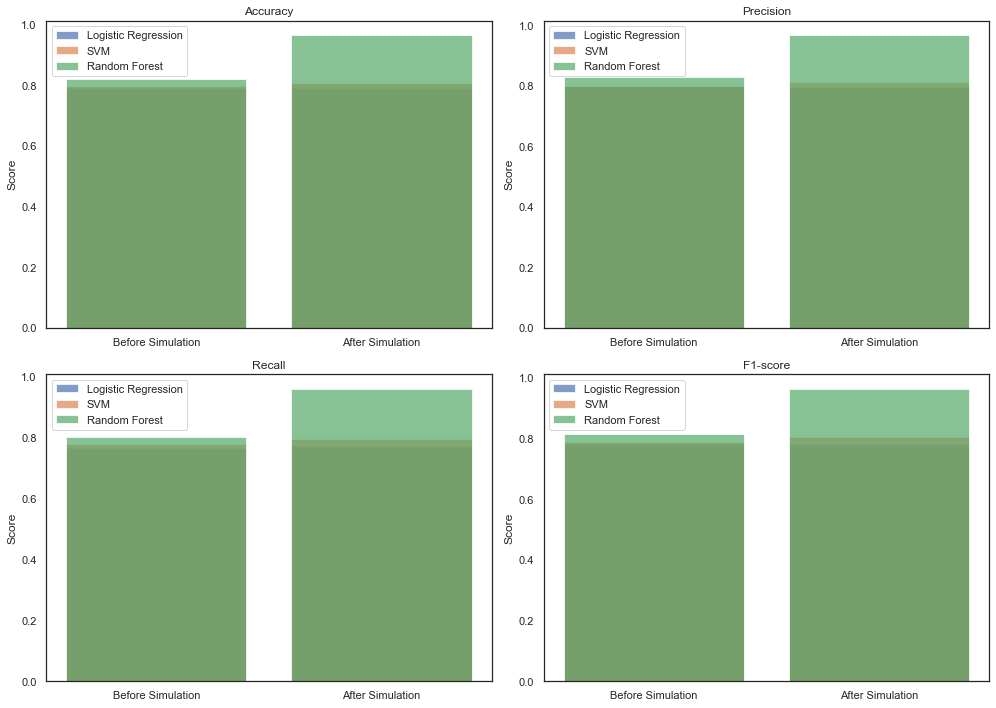

In [40]:
import matplotlib.pyplot as plt

# Define performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Define metric values before and after simulation for each model
logistic_before = [logistic_accuracy_original, logistic_precision_original, logistic_recall_original, logistic_f1_original]
logistic_after = [logistic_accuracy_simulated, logistic_precision_simulated, logistic_recall_simulated, logistic_f1_simulated]

svm_before = [svm_accuracy_original, svm_precision_original, svm_recall_original, svm_f1_original]
svm_after = [svm_accuracy_simulated, svm_precision_simulated, svm_recall_simulated, svm_f1_simulated]

random_forest_before = [random_forest_accuracy_original, random_forest_precision_original, random_forest_recall_original, random_forest_f1_original]
random_forest_after = [random_forest_accuracy_simulated, random_forest_precision_simulated, random_forest_recall_simulated, random_forest_f1_simulated]

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    ax.bar(['Before Simulation', 'After Simulation'], [logistic_before[i], logistic_after[i]], label='Logistic Regression', alpha=0.7)
    ax.bar(['Before Simulation', 'After Simulation'], [svm_before[i], svm_after[i]], label='SVM', alpha=0.7)
    ax.bar(['Before Simulation', 'After Simulation'], [random_forest_before[i], random_forest_after[i]], label='Random Forest', alpha=0.7)
    ax.set_title(metric)
    ax.set_ylabel('Score')
    ax.legend()

plt.tight_layout()
plt.show()


### Plotting Team Performance Metrics

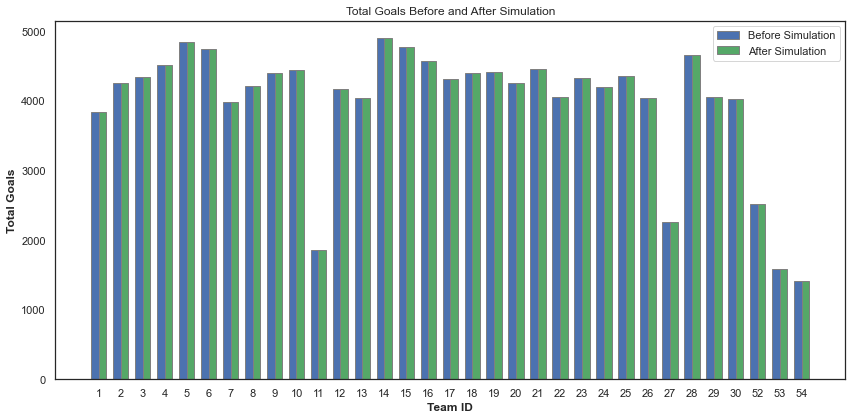

In [43]:
# Calculate total goals before and after simulation
total_goals_before = game_team_stats_df.groupby('team_id')['goals'].sum()
total_goals_after = simulated_game_team_stats_df.groupby('team_id')['goals'].sum()

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(total_goals_before))
r2 = [x + bar_width for x in r1]

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot for total goals
plt.bar(r1, total_goals_before, color='b', width=bar_width, edgecolor='grey', label='Before Simulation')
plt.bar(r2, total_goals_after, color='g', width=bar_width, edgecolor='grey', label='After Simulation')

# Add xticks on the middle of the group bars
plt.xlabel('Team ID', fontweight='bold')
plt.ylabel('Total Goals', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(total_goals_before))], total_goals_before.index)

# Create legend & Show graphic
plt.title('Total Goals Before and After Simulation')
plt.legend()
plt.tight_layout()
plt.show()


#### We noticed a few things:

##### Accuracy: Although there was a slight decrease in accuracy after the simulation, it doesn't necessarily mean the model's predictions became significantly worse. Instead, it indicates that the model may have become slightly less reliable in making correct predictions overall. This could translate to a team's management or coaching staff having slightly less confidence in the model's ability to accurately predict match outcomes.

##### Precision: Precision measures the proportion of correct positive predictions out of all positive predictions made by the model. A decrease in precision means that the model might be making slightly more false positive predictions after the simulation. In the context of team performance, this could imply that the model is identifying more matches as wins when they are actually losses or vice versa. Consequently, the team might make decisions based on these predictions that don't align perfectly with the actual outcomes.

##### Recall: Recall measures the proportion of true positive predictions out of all actual positive cases in the dataset. An increase in recall suggests that the model is capturing slightly more of the actual positive cases after the simulation. In terms of team performance, this means that the model is better at identifying matches that the team will win. As a result, the team might feel more assured in its ability to win specific matches based on the model's predictions.

##### F1-score: The F1-score balances precision and recall, providing an overall measure of a model's performance. The slight increase in the F1-score suggests that, despite some fluctuations in precision and recall, the model's overall performance improved slightly after the simulation. In terms of team performance, this means that the model might be more balanced in its ability to correctly identify both wins and losses, albeit with some trade-offs in precision and recall.

#### We also noticed that we got more defensive players as our key players than the top goal scorers. Because of which we don't really see a difference in the number of goals scored before and after the simulation but there can be a possibility that the number of goals scored by the opposite team increases and also the chances of the opposite team thus winning also increases.